#### 1. Background Information

# 2. Exploratory Data Analysis

In [2]:
# Import packages
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Load data
sleep = pd.read_excel("2015SleepinAmericaPollSleepandPainRawDataExcel.xlsx")

## 2.1 Data Cleaning & Variable Construction

In [4]:
# Filter out observations without data for key variables of interets: time in bed and actual sleep data
sleep = sleep.loc[~(sleep.DOV_WEEKTIME.isna() | sleep.DOV_WEEKEND.isna() | sleep.DOV_TOTALWEEK.isna() | sleep.DOV_TOTALWEEKEND.isna())]

In [5]:
# Variable Construction

# average hours in bed per day
sleep['avg_bed'] = (sleep.DOV_WEEKTIME/ 60 * 5 + sleep.DOV_WEEKEND / 60 * 2)/ 7
# average actual sleep per day
sleep['avg_actual_sleep'] = (sleep.DOV_TOTALWEEK/ 60 * 5 + sleep.DOV_TOTALWEEKEND / 60 * 2)/ 7
 
# Define sleep efficiency as average actual sleep per day/average sleep hours per day
sleep['sleep_efficiency'] = sleep.avg_actual_sleep/sleep.avg_bed
sleep.loc[sleep.sleep_efficiency > 1, 'sleep_efficiency'] = 1

# Whether the person go to bed before or after mid-night on weekdays
sleep['before_mnt_week'] = 'Before Mid-night'
sleep.before_mnt_week.loc[sleep.Q2_ampmA == 1] = 'After Mid-night'
# Whether the person go to bed before or after mid-night on weekends
sleep['before_mnt_weekend'] = 'Before Mid-night'
sleep.before_mnt_weekend.loc[sleep.Q3_ampmA == 1] = 'After Mid-night'

/Users/MichaelMiao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
# Reverse Coding
def reverse_code(col):
    return col.max() - col + 1

# Motivation to make sure you have enough time to sleep
sleep['Q16_rev'] = reverse_code(sleep.Q16)

# Importance of going to bed at a suitable time
sleep['Q17_rev'] = reverse_code(sleep.Q17)

# Sleep Disorders
sleep['Q22_rev'] = sleep.Q22
sleep.loc[sleep.Q22 == 2, 'Q22_rev'] = 0

## 2.2 Individual Variables 

### 2.2.1 Sleep Quality

Text(0.5, 0, 'Sleep Quality')

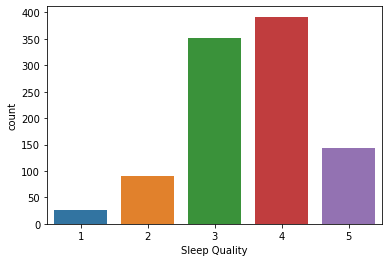

In [7]:
sns.countplot(x="Q10_a", data=sleep)
plt.xlabel('Sleep Quality')

### 2.2.2 Average Hours in Bed Per Day

Text(0.5, 0, 'Average Hours in Bed Per Day')

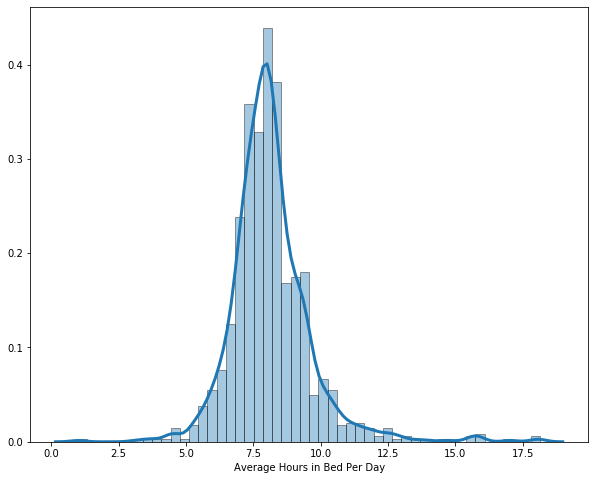

In [7]:
fig = plt.figure(figsize = [10,8])
sns.distplot(sleep.avg_bed, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('Average Hours in Bed Per Day')

### 2.2.3 Average Actual Sleep Per Day

Text(0.5, 0, 'Average Actual Sleep Per Day')

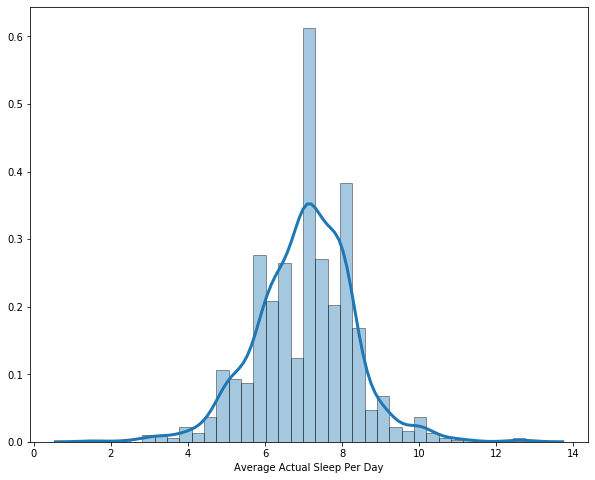

In [8]:
fig = plt.figure(figsize = [10,8])
sns.distplot(sleep.avg_actual_sleep, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('Average Actual Sleep Per Day')

### 2.2.4 Sleep Efficiency

Text(0.5, 0, 'Sleep Efficiency')

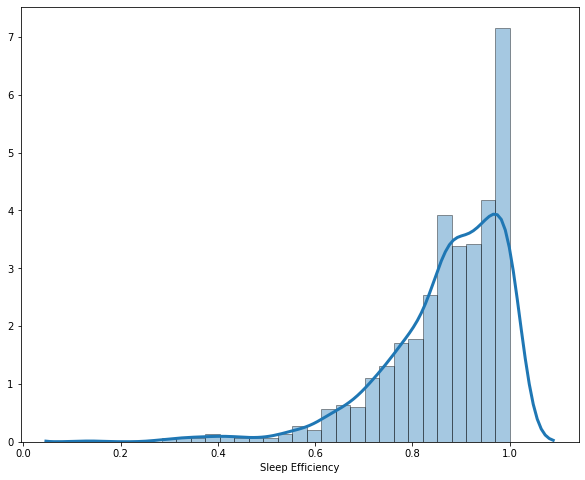

In [9]:
fig = plt.figure(figsize = [10,8])
sns.distplot(sleep.sleep_efficiency, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('Sleep Efficiency')

## 2.3 Relationship between Variables

### 2.3.1 Sleep Efficiency & Sleep Quality

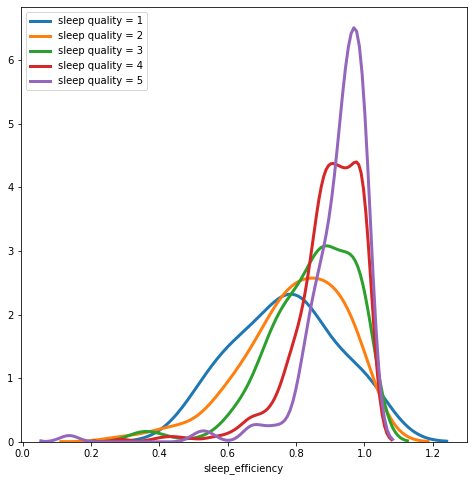

In [10]:
fig = plt.figure(figsize = [8,8])

for i in range(1,6): 
    sns.distplot(sleep.sleep_efficiency.loc[sleep.Q10_a == i], label = 'sleep quality = ' + str(i), hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.legend()

### 2.3.2 Time Go to Bed & Sleep Efficiency

Text(0.5, 0, 'Sleep Efficiency')

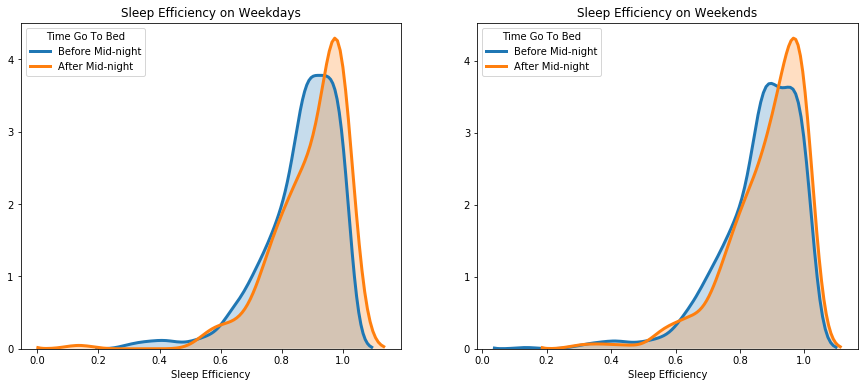

In [11]:
fig = plt.figure(figsize = [15,6])

# Weekdays
ax = fig.add_subplot(121)
sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

plt.title('Sleep Efficiency on Weekdays')
plt.legend(loc = 'upper left', title = 'Time Go To Bed')
plt.xlabel('Sleep Efficiency')

# Weekends
ax = fig.add_subplot(122)
sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)
plt.title('Sleep Efficiency on Weekends')
plt.legend(loc = 'upper left',title = 'Time Go To Bed')
plt.xlabel('Sleep Efficiency')

### 2.3.3 Time Go to Bed & Sleep Quality

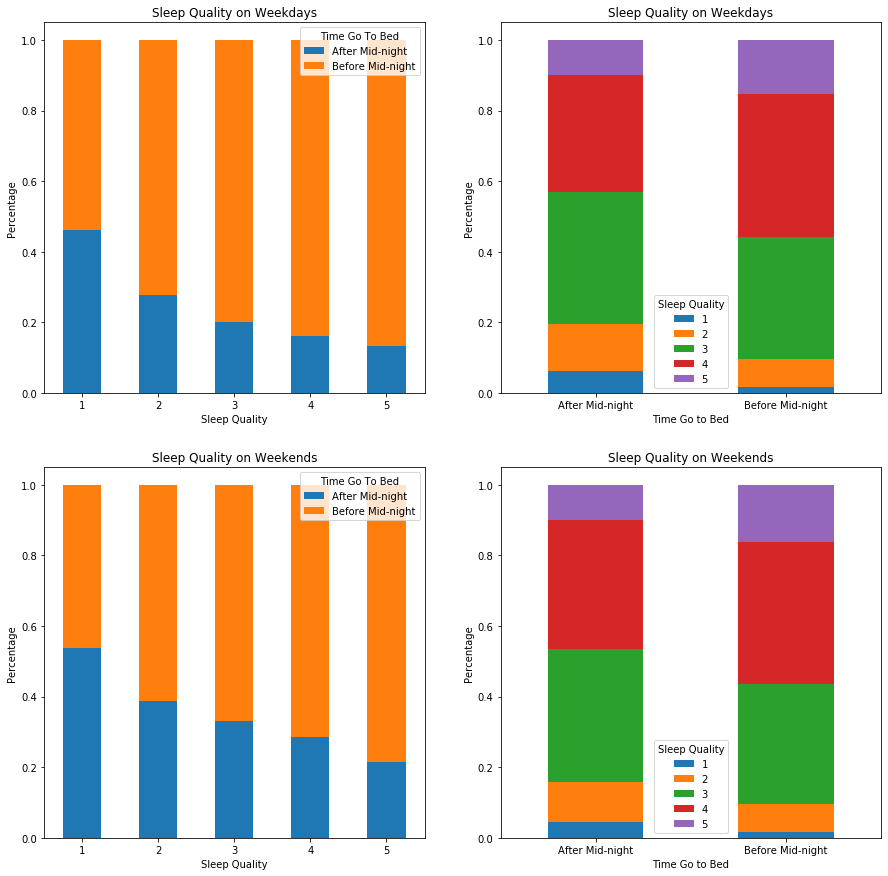

In [12]:
fig = plt.figure(figsize = [15,15])

# Weekdays
ax = fig.add_subplot(221)
bar_data_week = sleep.groupby('Q10_a').before_mnt_week.value_counts(normalize=True).unstack()
bar_data_week.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekends
ax = fig.add_subplot(223)
bar_data_weekend = sleep.groupby('Q10_a').before_mnt_weekend.value_counts(normalize=True).unstack()
bar_data_weekend.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekdays
ax = fig.add_subplot(222)
bar_data_week2 = sleep.groupby('before_mnt_week').Q10_a.value_counts(normalize=True).unstack()
bar_data_week2.plot(rot=0, kind = 'bar', title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')


# Weekends
ax = fig.add_subplot(224)
bar_data_weekend2 = sleep.groupby('before_mnt_weekend').Q10_a.value_counts(normalize=True).unstack()

bar_data_weekend2.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')

plt.show()

### 2.3.4 Sleep Disorders & Sleep Quality

Text(0.5, 0, 'Sleep Disorder')

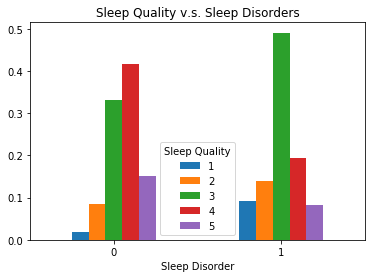

In [13]:
bar_data_disorder = sleep.loc[sleep.Q22_rev != -1].groupby('Q22_rev').Q10_a.value_counts(normalize=True).unstack()

bar_data_disorder.plot(rot=0, kind = 'bar',title = 'Sleep Quality v.s. Sleep Disorders')
plt.legend(title = 'Sleep Quality')
plt.xlabel('Sleep Disorder')

In [7]:
labels = 'Apenea', 'Insomnia', 'Other'
sizes = [sleep['Q23_a'].value_counts()[1], sleep['Q23_b'].value_counts()[1],sleep['Q23_c'].value_counts()[1]]

plt.axis('equal')
plt.pie(sizes, labels=labels, radius=1.5,autopct='%0.1f%%',shadow=True,explode=[0.1,0,0], textprops = {'fontsize': 14})
plt.show()

NameError: name 'sleep' is not defined

### 2.3.5 Other Factors Correlated with Sleep Quality

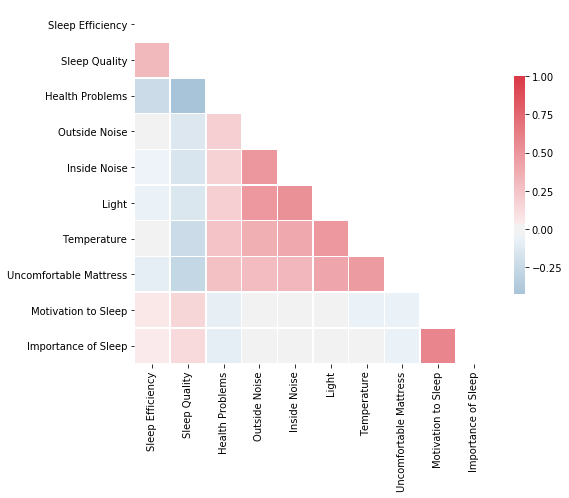

In [15]:
corr_data = sleep.loc[:, ['sleep_efficiency', 'Q10_a','Q14a','Q15_a', 'Q15_b', 'Q15_c', 'Q15_d', 'Q15_e','Q16_rev', 'Q17_rev']]
corr_data.columns = ['Sleep Efficiency', 'Sleep Quality', 'Health Problems', 'Outside Noise', 'Inside Noise', 'Light','Temperature', 'Uncomfortable Mattress', 'Motivation to Sleep', 'Importance of Sleep']

corr = corr_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
figure, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(600, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center=0,
            square = True, linewidths = .5, cbar_kws={"shrink": .5})

In [16]:
# Number of people with sleeping efficiency < 0.8
sleep.loc[sleep.sleep_efficiency < 0.8].shape

(232, 199)

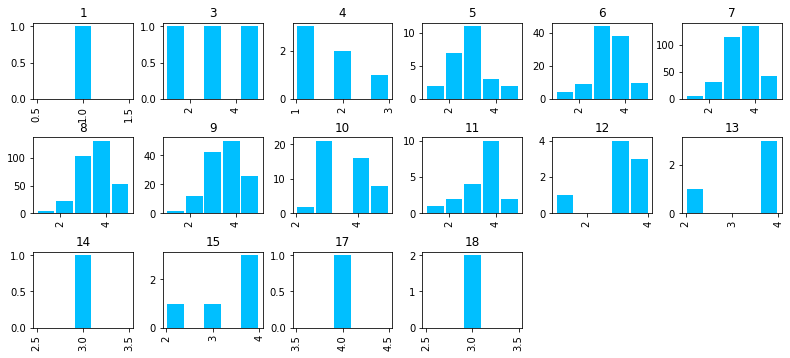

In [76]:
import math
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
#sleep.shape


sleep['cat_avg_bed'] = [math.floor(x) for x in sleep.avg_bed]
#sleep.shape
new_sleep = sleep.loc[sleep.Q6_HoursB>=0,['qua','cat_avg_bed']]
#new_sleep.shape
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(13,12),layout=(6,6),by=new_sleep.cat_avg_bed,color=["deepskyblue"])



NameError: name 'model_decision' is not defined

6 ~ 10 hours         876
above 10 hours       105
less than 6 hours     22
Name: avg_bed2, dtype: int64

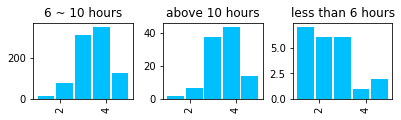

In [187]:
sleep['avg_bed2']=sleep['avg_bed']
#sleep['avg_bed2'].head(8)
sleep['avg_bed2'].loc[sleep.avg_bed<=5.5]= "less than 6 hours"
sleep['avg_bed2'].loc[sleep.avg_bed>9.5]= "above 10 hours"
sleep['avg_bed2'].loc[(sleep.avg_bed>5.5) & (sleep.avg_bed<=9.5)]= "6 ~ 10 hours"
sleep['avg_bed2'].value_counts()
new_sleep = sleep[['qua','avg_bed2']]
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(13,12),layout=(6,6),by=new_sleep.avg_bed2,color=["deepskyblue"])

6-9 hours            928
over 9 hours          40
less than 6 hours     35
Name: cat_avg_bed, dtype: int64

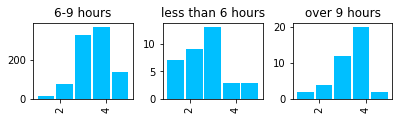

In [188]:
sleep['cat_avg_bed'] = [math.floor(x) for x in sleep.avg_bed]
sleep['cat_avg_bed']=sleep['cat_avg_bed'].replace([1,2,3,4,5],"less than 6 hours")
sleep['cat_avg_bed']=sleep['cat_avg_bed'].replace([6,7,8,9,10],"6-9 hours")
sleep['cat_avg_bed']=sleep['cat_avg_bed'].replace([11,12,13,14,15,16,17,18,19],"over 9 hours")
sleep['cat_avg_bed'].value_counts()
new_sleep = sleep.loc[sleep.Q6_HoursB>=0,['qua','cat_avg_bed']]
#new_sleep.shape
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(13,12),layout=(6,6),by=new_sleep.cat_avg_bed,color=["deepskyblue"])





##  Regression for Sleep Quality and Bedtime

7.321428571428571

8.75

8.0

7.321428571428571

8.75

8.0

Q1 ~ Q2     294
Below Q1    254
Above Q3    247
Q2 ~ Q3     208
Name: quan_avg_bed, dtype: int64

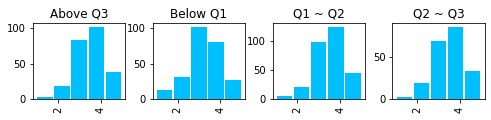

In [162]:
sleep['avg_bed'].quantile(0.25)
sleep['avg_bed'].quantile(0.75)
sleep['avg_bed'].quantile(0.50)
sleep['quan_avg_bed']=sleep['avg_bed']
sleep['quan_avg_bed'].loc[sleep.avg_bed<=7.321428571428571]="Below Q1"
sleep['quan_avg_bed'].loc[(sleep.avg_bed<=8.0) & (sleep.avg_bed>7.321428571428571)]="Q1 ~ Q2"
sleep['quan_avg_bed'].loc[(sleep.avg_bed>8.0) & (sleep.avg_bed<=8.75)]="Q2 ~ Q3"
sleep['quan_avg_bed'].loc[sleep.avg_bed>8.75]="Above Q3"
sleep.quan_avg_bed.value_counts()

new_sleep = sleep.loc[sleep.Q6_HoursB>=0,['qua','quan_avg_bed']]
#new_sleep.shape
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(12,12),layout=(6,6),by=new_sleep.quan_avg_bed,color=["deepskyblue"])


In [193]:
!pip install plotly


In [ ]:
# sleep eff
# ave_acutal 
# disorer
# environmental factor
# time go to bad 
# ave_bed 

In [15]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [24]:
sleep.before

In [ ]:
sleep.

In [52]:
sleep.Q15_a.value_counts()

 1    457
 2    372
 3    146
 4     18
 5      8
-1      2
Name: Q15_a, dtype: int64

In [55]:

sleep.Q14_a.value_counts()

4    473
3    320
2     95
5     92
1     23
Name: Q14_a, dtype: int64

In [31]:
new_sleep.sm_quality.value_counts()

1    536
2    351
3    116
Name: sm_quality, dtype: int64

In [7]:
new_sleep= sleep[['sleep_efficiency','avg_bed',"avg_actual_sleep",'Q10_a','before_mnt_week',"before_mnt_weekend","Q22_rev",'Q16_rev',"Q17_rev","Q15_a","Q15_b","Q15_c","Q15_d","Q15_e",'Q14a','Q10_a_3']]

new_sleep.columns=['efficiency','avg_bedtime',"avg_actual_sleeptime","quality",'weekday_midnight',"weekend_midnight","disorder","motivation","ontime_bed","outside_noise","inside_noise","light","temperature","mattress",'health','sm_quality']
new_sleep.head(2)
new_sleep.shape
import statsmodels.api as sm

df=new_sleep
df=df.loc[df.disorder!=-1,]
df=df.loc[df.light!=-1,]
df=df.loc[df.motivation!=-1,]
df=df.loc[df.ontime_bed!=-1,]
df=df.loc[df.inside_noise!=-1,]
df=df.loc[df.mattress!=-1,]
df=df.loc[df.health!=-1,]

df.weekday_midnight=df['weekday_midnight'].replace(['Before Mid-night'],1)
df.weekday_midnight=df['weekday_midnight'].replace(['After Mid-night'],0)
df.weekday_midnight.value_counts()
df.weekend_midnight=df['weekend_midnight'].replace(['Before Mid-night'],1)
df.weekend_midnight=df['weekend_midnight'].replace(['After Mid-night'],0)
df.weekend_midnight.value_counts()
df.shape
df.head(3)

,efficiency,avg_bedtime,avg_actual_sleeptime,quality,weekday_midnight,weekend_midnight,disorder,motivation,ontime_bed,outside_noise,inside_noise,light,temperature,mattress,health,sm_quality
0,0.605970,11.964286,7.25,4,Before Mid-night,Before Mid-night,0,3,4,2,1,1,3,1,3,1
1,0.888889,9.000000,8.00,4,Before Mid-night,Before Mid-night,0,4,3,3,2,2,3,2,2,1


(1003, 16)

1    805
0    188
Name: weekday_midnight, dtype: int64

1    687
0    306
Name: weekend_midnight, dtype: int64

(993, 16)

,efficiency,avg_bedtime,avg_actual_sleeptime,quality,weekday_midnight,weekend_midnight,disorder,motivation,ontime_bed,outside_noise,inside_noise,light,temperature,mattress,health,sm_quality
0,0.605970,11.964286,7.25,4,1,1,0,3,4,2,1,1,3,1,3,1
1,0.888889,9.000000,8.00,4,1,1,0,4,3,3,2,2,3,2,2,1
2,0.957265,8.357143,8.00,4,1,1,0,5,5,1,1,1,2,1,2,1


In [260]:
X=df.drop(['quality'],axis=1)
X.head(3)
Y=df[['quality']]
Y.head(3)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

,efficiency,avg_bedtime,avg_actual_sleeptime,weekday_midnight,weekend_midnight,disorder,motivation,ontime_bed,outside_noise,inside_noise,light,temperature,mattress,health
0,0.605970,11.964286,7.25,1,1,0,3,4,2,1,1,3,1,3
1,0.888889,9.000000,8.00,1,1,0,4,3,3,2,2,3,2,2
2,0.957265,8.357143,8.00,1,1,0,5,5,1,1,1,2,1,2


,quality
0,4
1,4
2,4


                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1543.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                        23:15:07   Log-Likelihood:                         -1138.0
No. Observations:                 993   AIC:                                      2304.
Df Residuals:                     979   BIC:                                      2373.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### no insig

In [133]:
X=df.drop(['quality','avg_actual_sleeptime',"weekday_midnight",'weekend_midnight',"ontime_bed",'outside_noise','inside_noise','light'],axis=1)
X.head(3)
Y=df[['quality']]
Y.head(3)
model2 = sm.OLS(Y, X).fit()
predictions2 = model2.predict(X)
print(model2.summary())

,efficiency,avg_bedtime,disorder,motivation,temperature,mattress,health
0,0.605970,11.964286,0,3,3,1,3
1,0.888889,9.000000,0,4,3,2,2
2,0.957265,8.357143,0,5,2,1,2


,quality
0,4
1,4
2,4


                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              3048.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                        22:03:31   Log-Likelihood:                         -1147.3
No. Observations:                 993   AIC:                                      2309.
Df Residuals:                     986   BIC:                                      2343.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [151]:
sum((Y.quality-predictions2)**2)
sum((Y.quality-predictions)**2)

586.1975791595968

575.2847384859393

<Figure size 576x576 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text xticklabel objects>)

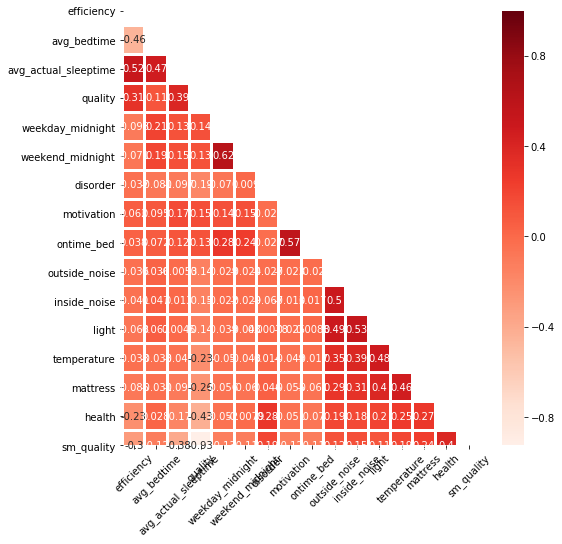

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(8,8))
cor = df.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, annot=True,linewidths=2,mask=mask,center=0,cmap=plt.cm.Reds)
plt.xticks(rotation=45)
plt.show()


AttributeError: module 'pandas' has no attribute 'anova'

## VIF


In [11]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [35]:

features = "+".join(df.columns.drop("quality","sm_quality"))
y, X = dmatrices('quality ~' + features, df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif[1:].round(1)

,VIF Factor,features
1,11.7,efficiency
2,10.6,avg_bedtime
3,11.6,avg_actual_sleeptime
4,1.7,weekday_midnight
5,1.7,weekend_midnight
6,1.1,disorder
7,1.5,motivation
8,1.6,ontime_bed
9,1.5,outside_noise
10,1.6,inside_noise


In [38]:

features = "+".join(df.columns.drop(["quality","sm_quality","avg_actual_sleeptime"]))
y, X = dmatrices('quality ~' + features, df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif[1:].round(1)

,VIF Factor,features
1,1.4,efficiency
2,1.4,avg_bedtime
3,1.7,weekday_midnight
4,1.7,weekend_midnight
5,1.1,disorder
6,1.5,motivation
7,1.6,ontime_bed
8,1.5,outside_noise
9,1.6,inside_noise
10,1.8,light


In [91]:
X=df.drop(['quality','avg_actual_sleeptime', 'ontime_bed','light','outside_noise','sm_quality'],axis=1)
X.head(3)
Y=df[['quality']]
Y.head(3)
model4 = sm.OLS(Y, X).fit()
predictions4 = model4.predict(X)
print(model4.summary())

,efficiency,avg_bedtime,weekday_midnight,weekend_midnight,disorder,motivation,inside_noise,temperature,mattress,health
0,0.605970,11.964286,1,1,0,3,1,3,1,3
1,0.888889,9.000000,1,1,0,4,2,3,2,2
2,0.957265,8.357143,1,1,0,5,1,2,1,2


,quality
0,4
1,4
2,4


                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              2164.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):                        0.00
Time:                        13:20:57   Log-Likelihood:                         -1139.2
No. Observations:                 993   AIC:                                      2298.
Df Residuals:                     983   BIC:                                      2347.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [29]:
1-np.mean(predictions4.round(0)!=Y.quality)

0.5025176233635449

In [14]:

features = "+".join(df.columns.drop(["quality",'avg_actual_sleeptime','ontime_bed','light','outside_noise']))
y, X = dmatrices('quality ~' +features , df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif[1:].round(1)

,VIF Factor,features
1,1.4,efficiency
2,1.4,avg_bedtime
3,1.7,weekday_midnight
4,1.7,weekend_midnight
5,1.1,disorder
6,1.0,motivation
7,1.2,inside_noise
8,1.4,temperature
9,1.4,mattress
10,1.3,health


## backward and forward

In [228]:
#!pip3 install git+git://github.com/UBC-MDS/PyPunisher@master

  Cloning git://github.com/UBC-MDS/PyPunisher (to master) to /var/folders/w0/2dzh_lp127d5sf4h497wd99h0000gn/T/pip-8xy5ml83-build
  Could not find a version that satisfies the requirement numpy (from pypunisher==4.0.1) (from versions: )
No matching distribution found for numpy (from pypunisher==4.0.1)


In [41]:
from tqdm import tnrange, tqdm_notebook
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [42]:
X=df.drop(['quality','avg_actual_sleeptime','sm_quality'],axis=1)
X.head(3)
Y=df[['quality']]
Y.head(3)

,efficiency,avg_bedtime,weekday_midnight,weekend_midnight,disorder,motivation,ontime_bed,outside_noise,inside_noise,light,temperature,mattress,health
0,0.605970,11.964286,1,1,0,3,4,2,1,1,3,1,3
1,0.888889,9.000000,1,1,0,4,3,3,2,2,3,2,2
2,0.957265,8.357143,1,1,0,5,5,1,1,1,2,1,2


,quality
0,4
1,4
2,4


In [43]:
k = 13
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
dff = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [44]:
df_min = dff[dff.groupby('numb_features')['RSS'].transform(min) == dff['RSS']]
df_max = dff[dff.groupby('numb_features')['R_squared'].transform(max) == dff['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
12,1,706.017019,0.183844,"(health,)"
24,2,666.106800,0.229980,"(efficiency, health)"
101,3,610.614571,0.294129,"(efficiency, avg_bedtime, health)"


,numb_features,RSS,R_squared,features
12,1,706.017019,0.183844,"(health,)"
24,2,666.106800,0.229980,"(efficiency, health)"
101,3,610.614571,0.294129,"(efficiency, avg_bedtime, health)"


In [270]:
dff['min_RSS'] = dff.groupby('numb_features')['RSS'].transform(min)
dff['max_R_squared'] = dff.groupby('numb_features')['R_squared'].transform(max)
dff.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,782.904900,0.094961,"(efficiency,)",706.017019,0.183844
1,1,853.901871,0.012889,"(avg_bedtime,)",706.017019,0.183844
2,1,848.297159,0.019368,"(weekday_midnight,)",706.017019,0.183844
3,1,850.432571,0.016899,"(weekend_midnight,)",706.017019,0.183844
4,1,835.033773,0.034700,"(disorder,)",706.017019,0.183844


Text(0.5, 0, '# Features')

Text(0, 0.5, 'RSS')

Text(0.5, 1.0, 'RSS - Best subset selection')

Text(0.5, 0, '# Features')

Text(0, 0.5, 'R squared')

Text(0.5, 1.0, 'R_squared - Best subset selection')

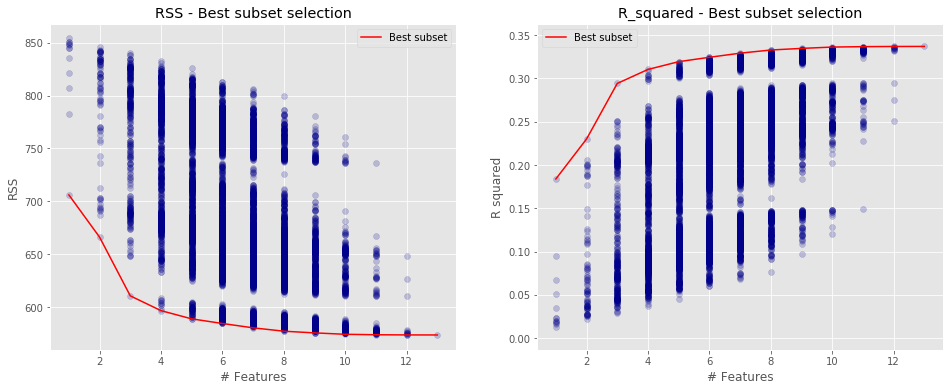

In [272]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(dff.numb_features,dff.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(dff.numb_features,dff.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(dff.numb_features,dff.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(dff.numb_features,dff.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

## forward

In [47]:
k = 13

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [48]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])


Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['health'], 706.0),
 (2, ['health', 'efficiency'], 666.0),
 (3, ['health', 'efficiency', 'avg_bedtime'], 611.0),
 (4, ['health', 'efficiency', 'avg_bedtime', 'mattress'], 597.0)]

In [49]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [50]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))


In [51]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()


10

0.32934752154115576

Text(0.5, 0, 'Number of predictors')

Text(0, 0.5, 'C_p')

Text(0.5, 0, 'Number of predictors')

Text(0, 0.5, 'AIC')

Text(0.5, 0, 'Number of predictors')

Text(0, 0.5, 'BIC')

Text(0.5, 0, 'Number of predictors')

Text(0, 0.5, 'R_squared_adj')

Text(0.5, 0.98, 'Subset selection using C_p, AIC, BIC, Adjusted R2')

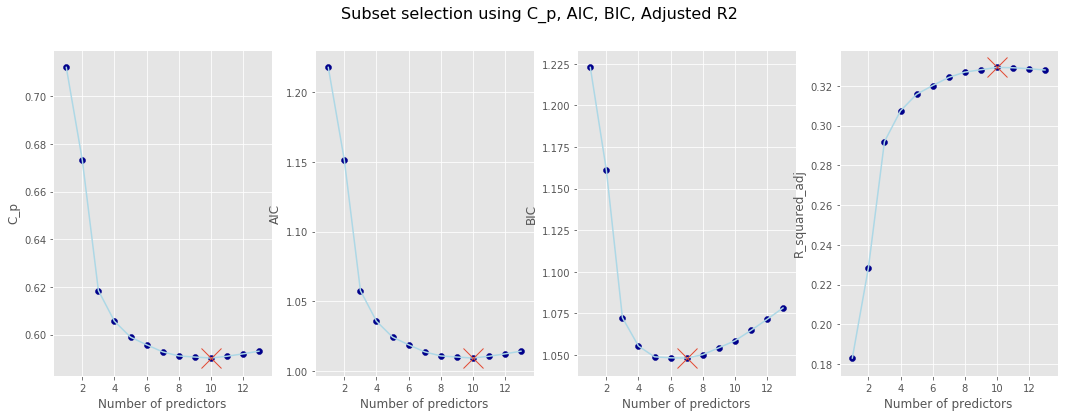

In [52]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [53]:
df1.features[10]

['health',
 'efficiency',
 'avg_bedtime',
 'mattress',
 'weekday_midnight',
 'motivation',
 'temperature',
 'disorder',
 'inside_noise',
 'weekend_midnight']

In [58]:
sns.pairplot(df[0:10,1:2])

TypeError: '(slice(0, 10, None), slice(1, 2, None))' is an invalid key

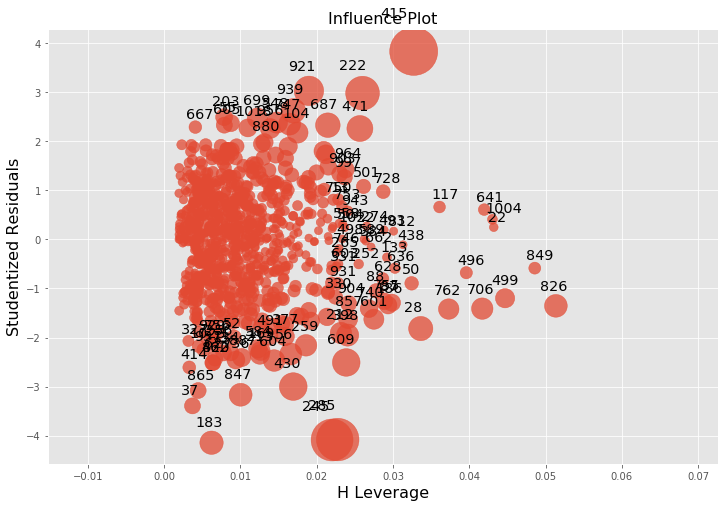

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model4, ax=ax, criterion="cooks")

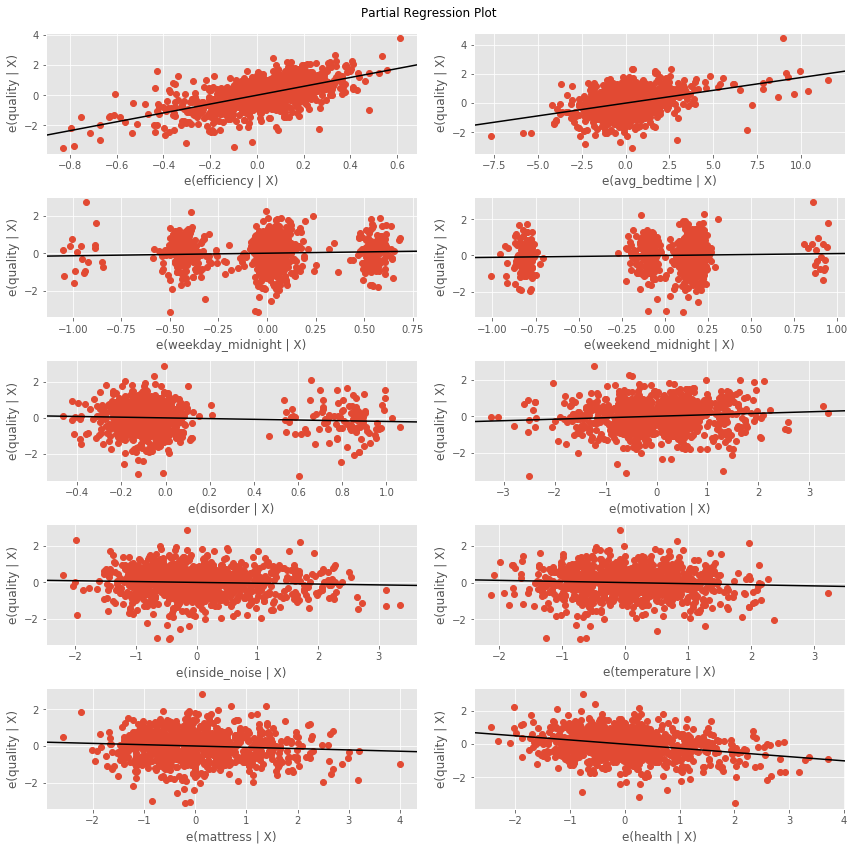

In [79]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(model4, fig=fig)

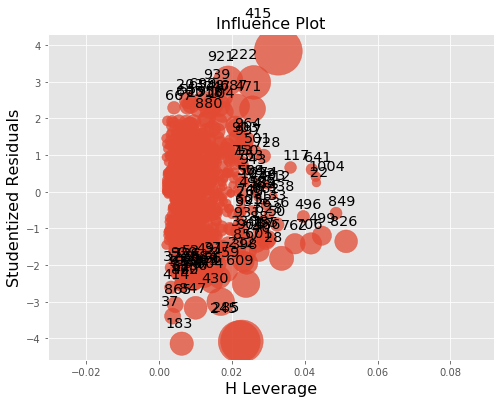

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(model4, ax=ax)

Ordinary Least Squares Assumptions
OLS measures the accuracy of a linear regression model.

OLS is built on assumptions which, if held, indicate the model may be the correct lens through which to interpret our data. If the assumptions don't hold, our model's conclusions lose their validity.

Take extra effort to choose the right model to avoid Auto-esotericism/Rube-Goldberg’s Disease.

Here are the OLS assumptions:

Linearity: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
No multicollinearity: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
Zero conditional mean: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
Homoskedasticity: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
No autocorrelation (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.
Let's begin modeling.

In [90]:
from IPython.display import HTML, display
housing_model_summary = model4.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

In [107]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3371c9b0>,
      dtype=object)

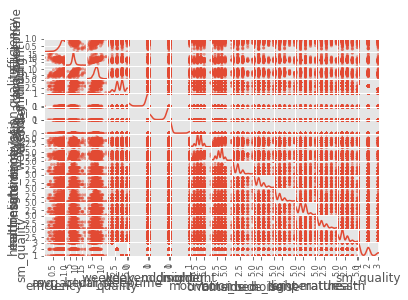

In [109]:
scatter_matrix(df, diagonal="kde")

In [115]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

Text(0.5, 0, 'health')

Text(0.5, 0, 'efficiency')

Text(0.5, 0, 'quality')

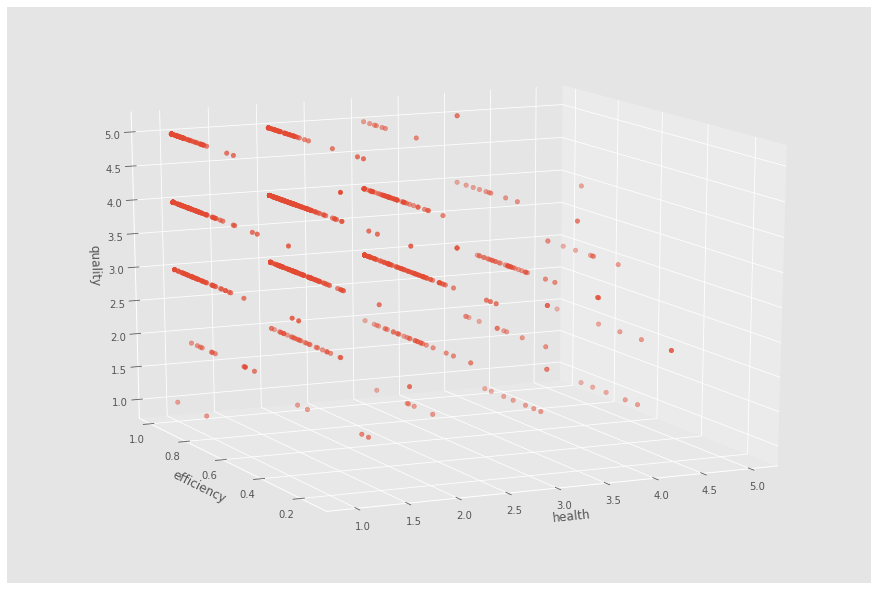

In [116]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15) 
ax.scatter(df["health"], df["efficiency"], df["quality"]) 
ax.set_xlabel("health")
ax.set_ylabel("efficiency")
ax.set_zlabel("quality")

In [19]:
df_express=df.iloc[0:100,[0,1,3,6,7,14,13]]
df_express.head(3)

,efficiency,avg_bedtime,quality,disorder,motivation,health,mattress
0,0.605970,11.964286,4,0,3,3,1
1,0.888889,9.000000,4,0,4,2,2
2,0.957265,8.357143,4,0,5,2,1


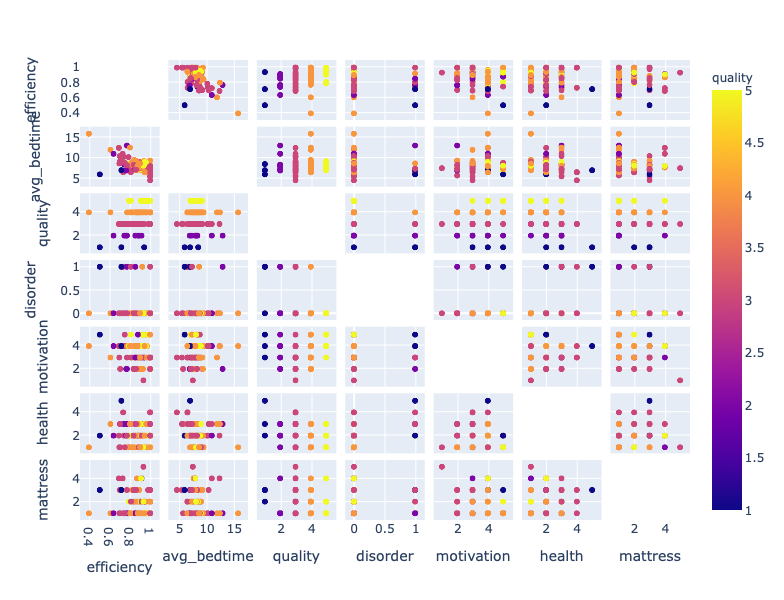

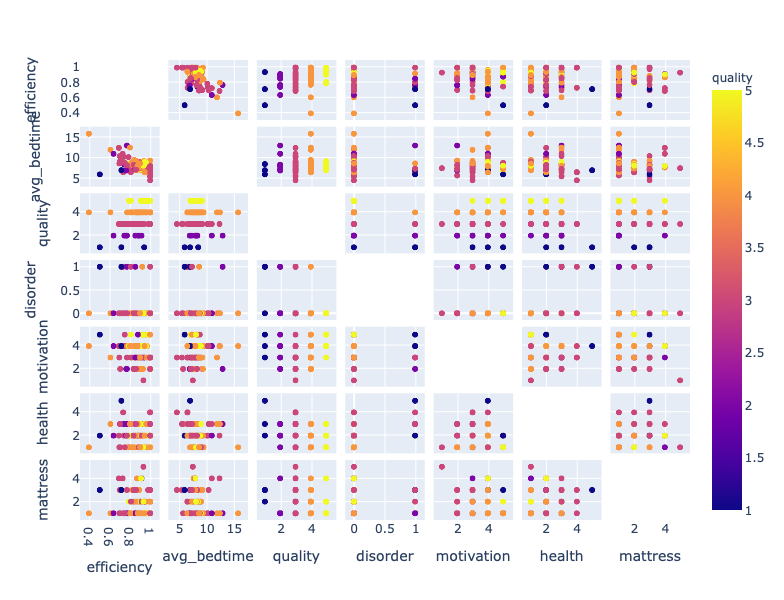

In [40]:
import plotly.express as px

fig = px.scatter_matrix(df_express,color="quality")
fig.update_traces(diagonal_visible=False)
fig.show()

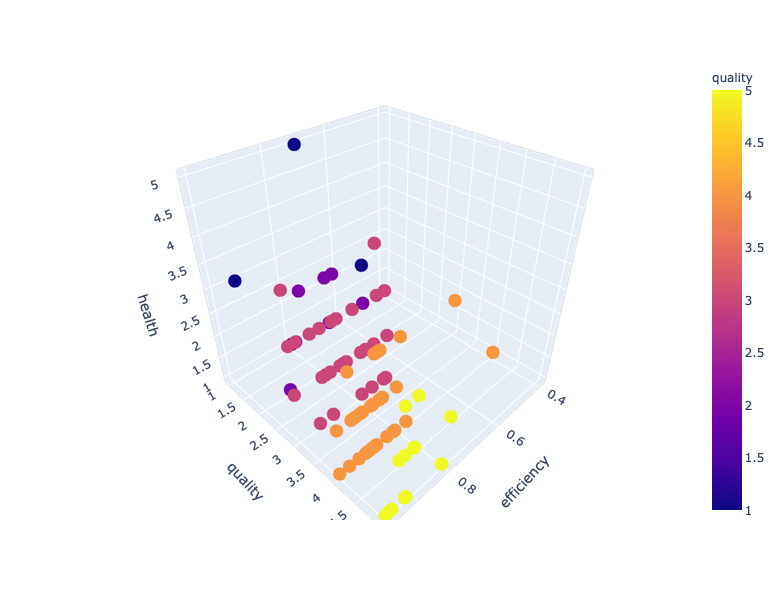

In [48]:
import plotly.express as px
#election = px.data.election()
fig = px.scatter_3d(df_express, z="health", y="quality", x="efficiency",
                  color="quality",)
fig.show()

In [55]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#iris = datasets.load_iris()
X=df_express.drop(['quality'],axis=1)
X.shape
Y=df_express[['quality']]
Y.shape
#X = iris.data
#y = iris.target


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

Automatically created module for IPython interactive environment


(100, 6)

(100, 1)

ValueError: Found input variables with inconsistent numbers of samples: [100, 150]

In [59]:

df.to_csv('new_sleep.csv',index=False)